# EDA for IMDB dataset

In [7]:
!pip install tqdm wordcloud nltk pandas openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
You should consider upgrading via the '/home/barteus/Work/tutorials/notebooks/venv2/bin/python -m pip install --upgrade pip' command.


In [8]:
%matplotlib inline

## Download and load data

In [9]:
import pandas as pd


def read_data(path):
    return pd.read_excel(path, index_col=0, names=["id","text", "positive"])


df_train = read_data('../data/imdb-train.xlsx')
df_test = read_data('../data/imdb-test.xlsx')

df_train.shape, df_test.shape

((25000, 2), (25000, 2))

In [10]:
df_all = pd.concat([df_train, df_test])
df_all.head()

,text,positive
id,,
0,b'zentropa has much in common with the third m...,1
1,b'zentropa is the most original movie ive seen...,1
2,b'lars von trier is never backward in trying o...,1
3,b'contains spoilers due to me having to descri...,1
4,b'that was the first thing that sprang to mind...,1


In [11]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/barteus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from collections import Counter


def words_frequency(texts, stop_words=None) -> Counter:
    if stop_words is None:
        stop_words = []
    word_frequency = Counter()
    for row in texts:
        for word in row.split(" "):
            if word not in stop_words:
                word_frequency[word] += 1
    return word_frequency


freq = words_frequency(df_all['text'], stop_words=stop_words)
freq.most_common(10)

[('br', 113547),
 ('movie', 82164),
 ('film', 73477),
 ('one', 50090),
 ('like', 38833),
 ('good', 28305),
 ('even', 24467),
 ('would', 23999),
 ('really', 22888),
 ('time', 22641)]

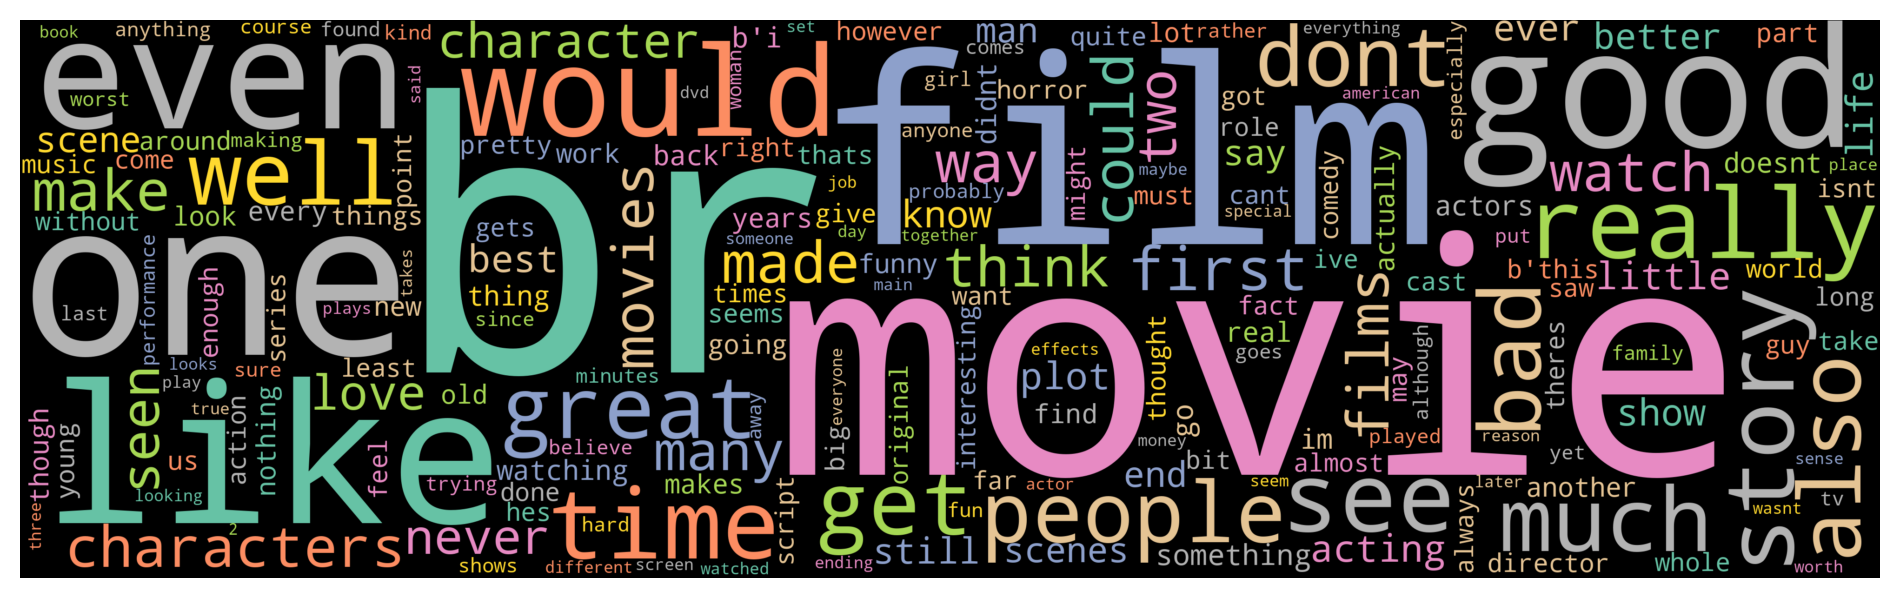

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = (WordCloud(width=4000, height=1200, random_state=1, background_color='black', colormap='Set2',
                       collocations=False, stopwords=STOPWORDS)
             .generate_from_frequencies(freq))

plt.imshow(wordcloud, interpolation='bilinear')
plt.rcParams['figure.figsize'] = [120, 80]
plt.rcParams['figure.dpi'] = 200
plt.axis('off')
plt.show()